In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("logs/mem_and_disk_results/memspeed.csv")

def parse_mb(x):
    return float(x.replace("MB/s", ""))

for col in ["memread_mb_s", "memwrite_mb_s", "memcpy_mb_s"]:
    df[col] = df[col].apply(parse_mb)

agg = (
    df
    .groupby(["pattern", "threads"])
    .agg(
        memread_mean=("memread_mb_s", "mean"),
        memread_std=("memread_mb_s", "std"),
        memwrite_mean=("memwrite_mb_s", "mean"),
        memwrite_std=("memwrite_mb_s", "std"),
        memcpy_mean=("memcpy_mb_s", "mean"),
        memcpy_std=("memcpy_mb_s", "std"),
    )
    .reset_index()
)

agg

,pattern,threads,memread_mean,memread_std,memwrite_mean,memwrite_std,memcpy_mean,memcpy_std
0,random,1,562.67220,14.329941,559.1410,8.587047,366.21460,1.926747
1,random,2,472.92540,19.157156,502.3068,13.476948,286.54700,4.862135
2,random,4,279.12020,9.017309,298.9248,3.245988,131.74560,1.378261
3,random,8,90.89616,1.056226,170.3136,1.708956,57.19478,0.186170
4,sequential,1,2828.08600,13.141196,3552.0700,15.827222,3231.22800,15.590676
5,sequential,2,2673.42200,14.913776,3215.9100,21.120215,2999.16800,14.958585
6,sequential,4,2596.42000,129.147815,3042.3420,17.344234,1168.52600,6.918654
7,sequential,8,569.61400,2.478323,1862.0320,228.693161,1038.22820,98.042344


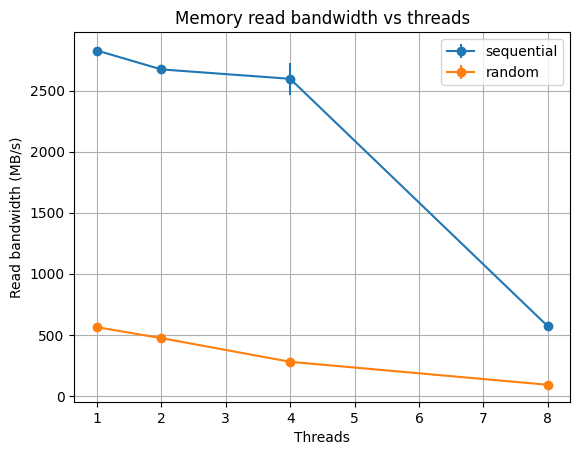

In [18]:
plt.figure()
for pattern in ["sequential", "random"]:
    subset = agg[agg["pattern"] == pattern]
    plt.errorbar(
        subset["threads"],
        subset["memread_mean"],
        yerr=subset["memread_std"],
        marker="o",
        label=pattern,
    )

plt.xlabel("Threads")
plt.ylabel("Read bandwidth (MB/s)")
plt.title("Memory read bandwidth vs threads")
plt.legend()
plt.grid(True)
plt.show()

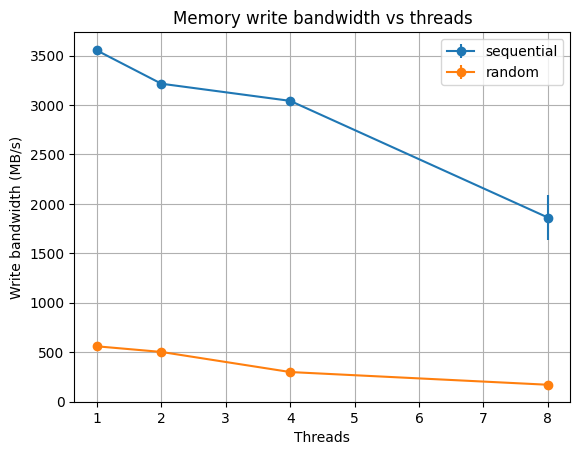

In [19]:
plt.figure()
for pattern in ["sequential", "random"]:
    subset = agg[agg["pattern"] == pattern]
    plt.errorbar(
        subset["threads"],
        subset["memwrite_mean"],
        yerr=subset["memwrite_std"],
        marker="o",
        label=pattern,
    )

plt.xlabel("Threads")
plt.ylabel("Write bandwidth (MB/s)")
plt.title("Memory write bandwidth vs threads")
plt.legend()
plt.grid(True)
plt.show()

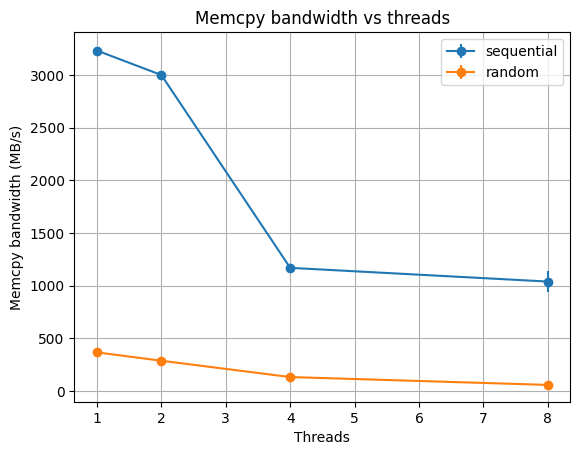

In [20]:
plt.figure()
for pattern in ["sequential", "random"]:
    subset = agg[agg["pattern"] == pattern]
    plt.errorbar(
        subset["threads"],
        subset["memcpy_mean"],
        yerr=subset["memcpy_std"],
        marker="o",
        label=pattern,
    )

plt.xlabel("Threads")
plt.ylabel("Memcpy bandwidth (MB/s)")
plt.title("Memcpy bandwidth vs threads")
plt.legend()
plt.grid(True)
plt.show()

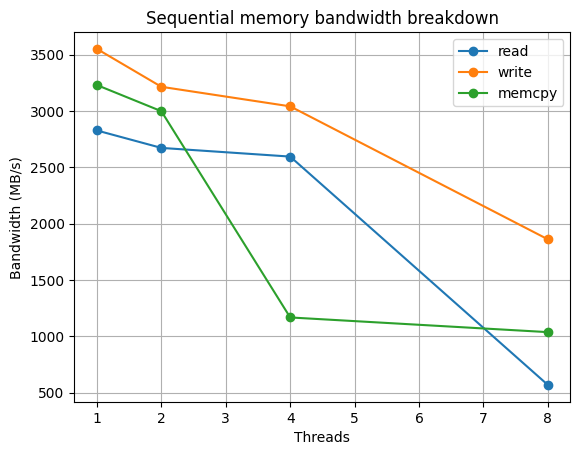

In [21]:
seq = agg[agg["pattern"] == "sequential"]

plt.figure()
plt.plot(seq["threads"], seq["memread_mean"], marker="o", label="read")
plt.plot(seq["threads"], seq["memwrite_mean"], marker="o", label="write")
plt.plot(seq["threads"], seq["memcpy_mean"], marker="o", label="memcpy")

plt.xlabel("Threads")
plt.ylabel("Bandwidth (MB/s)")
plt.title("Sequential memory bandwidth breakdown")
plt.legend()
plt.grid(True)
plt.show()

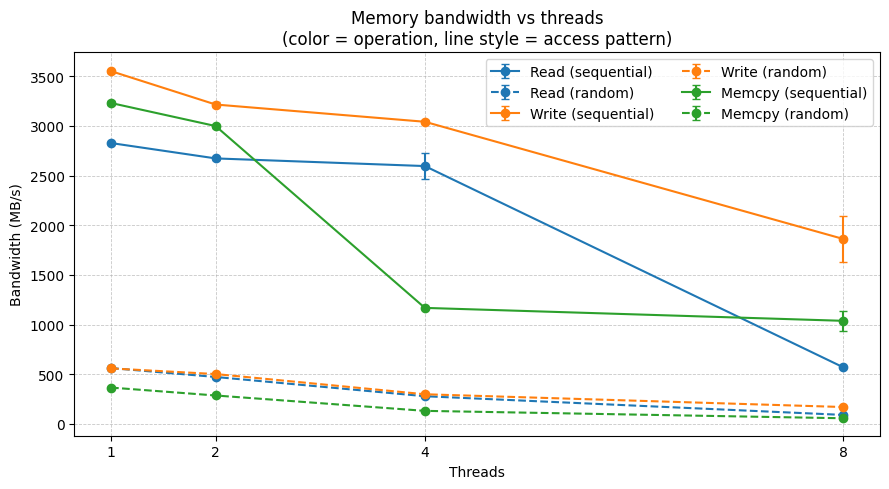

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("logs/mem_and_disk_results/memspeed.csv")

def parse_mb(x):
    return float(str(x).replace("MB/s", ""))

for col in ["memread_mb_s", "memwrite_mb_s", "memcpy_mb_s"]:
    df[col] = df[col].apply(parse_mb)

agg = (
    df.groupby(["pattern", "threads"])
      .agg(
          memread_mean=("memread_mb_s", "mean"),   memread_std=("memread_mb_s", "std"),
          memwrite_mean=("memwrite_mb_s", "mean"), memwrite_std=("memwrite_mb_s", "std"),
          memcpy_mean=("memcpy_mb_s", "mean"),     memcpy_std=("memcpy_mb_s", "std"),
      )
      .reset_index()
)

plt.figure(figsize=(9, 5))

colors = {
    "memread":  "tab:blue",
    "memwrite": "tab:orange",
    "memcpy":   "tab:green",
}

linestyles = {
    "sequential": "-",
    "random": "--",
}

labels = {
    "memread": "Read",
    "memwrite": "Write",
    "memcpy": "Memcpy",
}

for metric in ["memread", "memwrite", "memcpy"]:
    for pattern in ["sequential", "random"]:
        sub = agg[agg["pattern"] == pattern].sort_values("threads")
        plt.errorbar(
            sub["threads"],
            sub[f"{metric}_mean"],
            yerr=sub[f"{metric}_std"],
            color=colors[metric],
            linestyle=linestyles[pattern],
            marker="o",
            capsize=3,
            label=f"{labels[metric]} ({pattern})",
        )

plt.xlabel("Threads")
plt.ylabel("Bandwidth (MB/s)")
plt.title("Memory bandwidth vs threads\n(color = operation, line style = access pattern)")
plt.xticks(sorted(agg["threads"].unique()))
plt.grid(True, linestyle="--", linewidth=0.6, alpha=0.7)
plt.legend(ncol=2)
plt.tight_layout()
plt.savefig("mem_bandwidth_vs_threads", dpi=200)
plt.show()
